# 比较深度学习和GEANT4模拟一些重要分布的差异

In [1]:
import os, sys
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

utils_path = os.path.join(this_path, '../../../../code/utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)

from root_operations import *
from emc_info import EmcInfo
from emc_operations import *

In [2]:
geant4_root_file = os.path.join(this_path, '../../../../gen/anti_n0/p_1_theta_0/0.root')
nn_root_file = os.path.join(this_path, '0.root')


In [16]:
def preprocessRoot(root_data, pdg_code):
    root_data = selectTargetParticle(root_data, pdg_code)
    root_data = selectHitBarrel(root_data)
    # root_data = selectLeadingShowerInBarrel(root_data)

    return root_data

In [17]:
emc_info = EmcInfo()
def getDataInfo(root_data, region=5):
    global emc_info
    info = {}
    info['leading_shower_etot'] = [i[0] for i in root_data['shower_etot']]
    info['leading_shower_e5x5'] = [i[0] for i in root_data['shower_e5x5']]
    info['leading_shower_secmom'] = [i[0] for i in root_data['shower_secondmom']]
    info['region_shower_num'] = [sum(1 for j in root_data['shower_id'][i] if j in emc_info.getBarrelNearIds(root_data['shower_id'][i][0], region)) for i in range(len(root_data['shower_id']))]

    info = {k:np.array(v) for k,v in info.items()}
    return info
    

In [19]:
geant4_root_data = readRootFile(geant4_root_file, 'EmcInfo')
nn_root_data = readRootFile(nn_root_file, 'EmcInfo')

geant4_root_data = preprocessRoot(geant4_root_data, -2112)
nn_root_data = preprocessRoot(nn_root_data, -2112)

<Figure size 640x480 with 0 Axes>

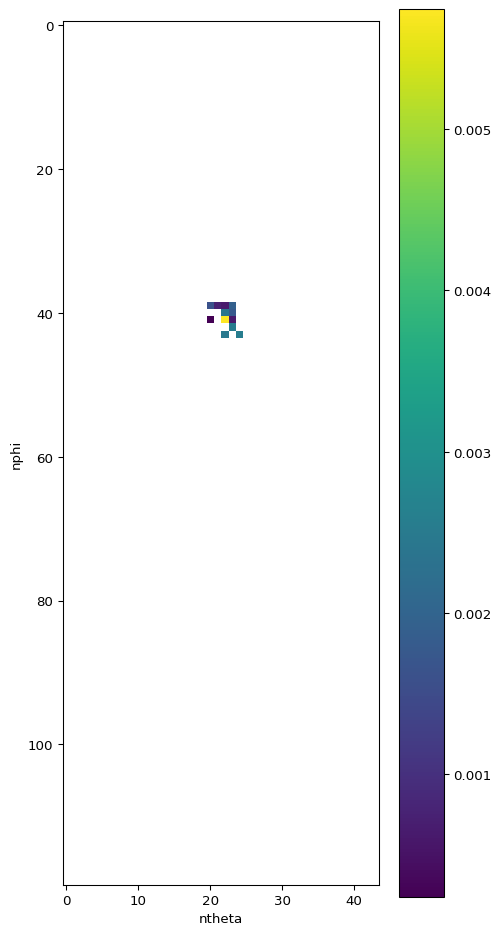

<Figure size 640x480 with 0 Axes>

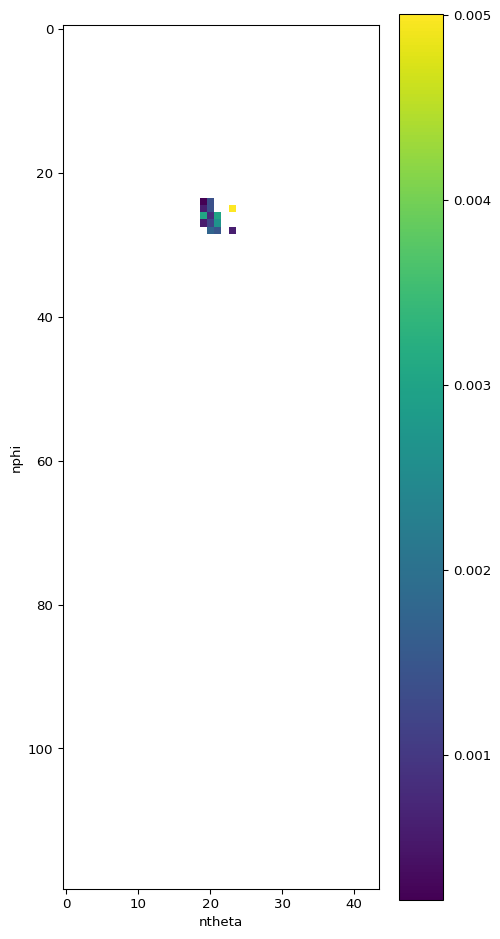

<Figure size 640x480 with 0 Axes>

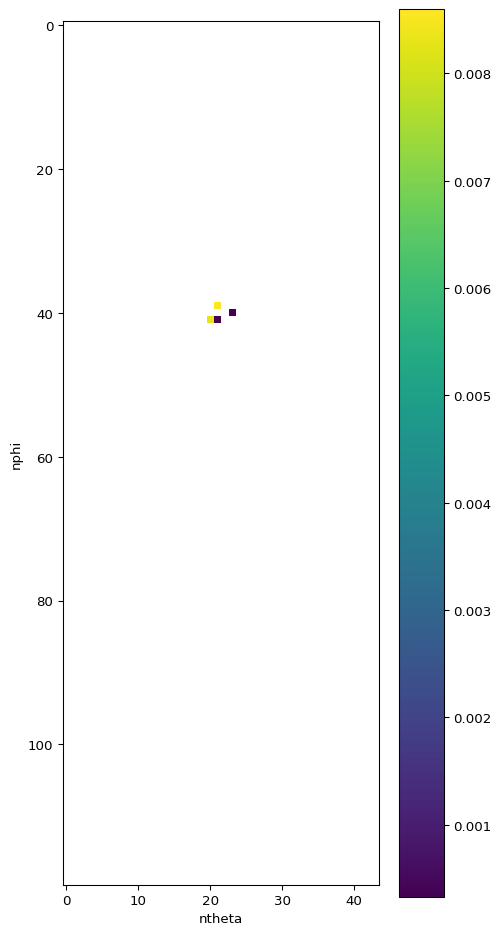

<Figure size 640x480 with 0 Axes>

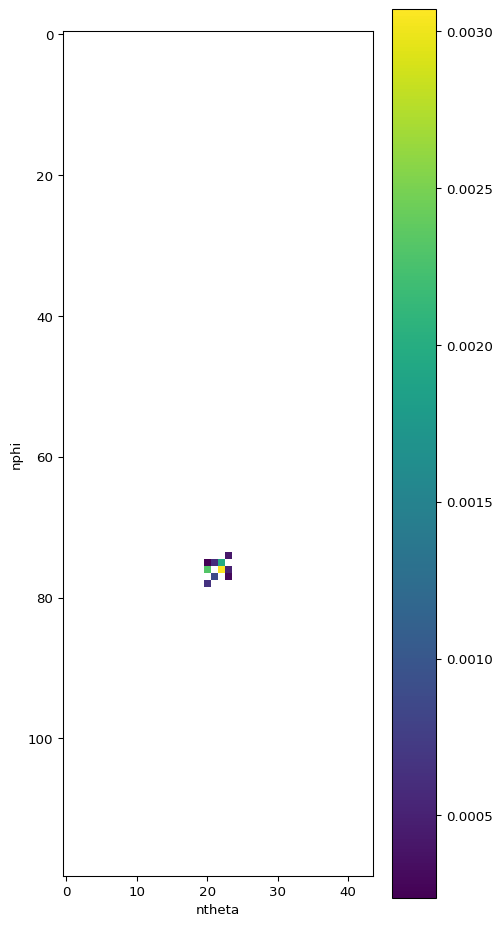

In [23]:
n = 0
for i in range(2000):
    if not (not len(nn_root_data['shower_id'][i]) or not emc_info.isInBarrel(nn_root_data['shower_id'][i][0])):
        continue
    img = getHitImgAll(dict(zip(nn_root_data['all_hit_cell_id'][i], nn_root_data['all_hit_energy'][i])))
    showHitImg(img, figsize=(5,10), marks=[emc_info.barrelId2Coordinate(j) for j in nn_root_data['shower_id'][i] if emc_info.isInBarrel(j)])
    plt.show()
    n += 1

In [7]:
region = 5
geant4_root_data_info = getDataInfo(geant4_root_data, region=region)
nn_root_data_info = getDataInfo(nn_root_data, region=region)

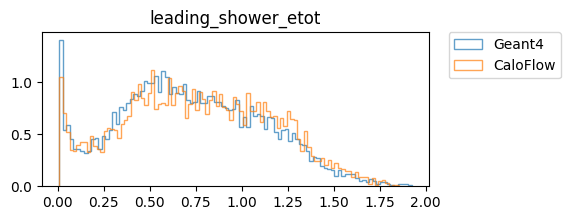

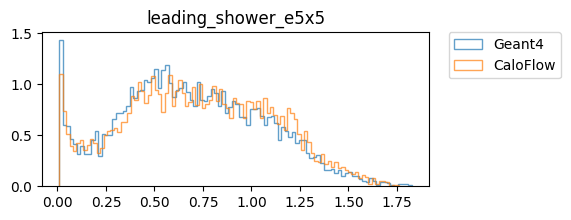

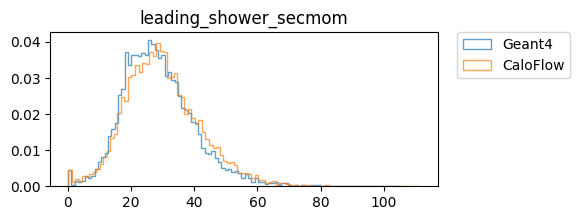

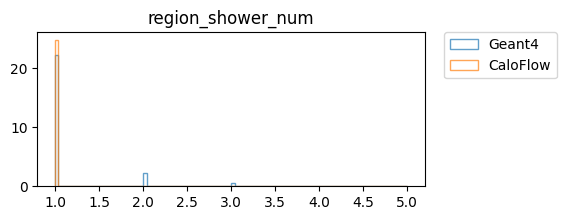

In [8]:
bins = 100
for k in geant4_root_data_info:
    plt.figure(figsize=(5,2))
    plt.hist(geant4_root_data_info[k], bins=bins, histtype='step', alpha=0.7, label='Geant4', density=True)
    plt.hist(nn_root_data_info[k], bins=bins, histtype='step', alpha=0.7, label='CaloFlow', density=True)
    plt.title(k)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.show()

<Figure size 640x480 with 0 Axes>

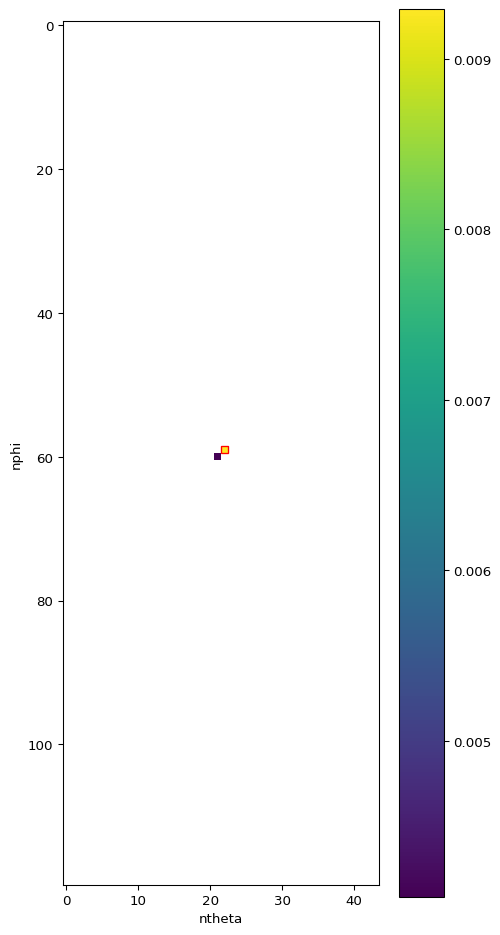

<Figure size 640x480 with 0 Axes>

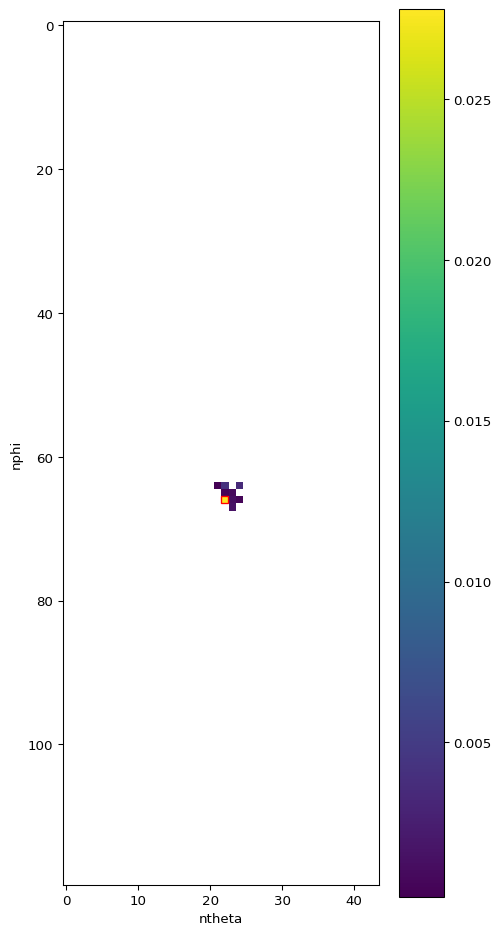

In [15]:
n = 0
for i in range(100):
    if nn_root_data_info['leading_shower_etot'][i] > 0.05:
        continue
    img = getHitImgAll(dict(zip(nn_root_data['all_hit_cell_id'][i], nn_root_data['all_hit_energy'][i])))
    showHitImg(img, figsize=(5,10), marks=[emc_info.barrelId2Coordinate(j) for j in nn_root_data['shower_id'][i] if emc_info.isInBarrel(j)])
    plt.show()
    n += 1

<Figure size 640x480 with 0 Axes>

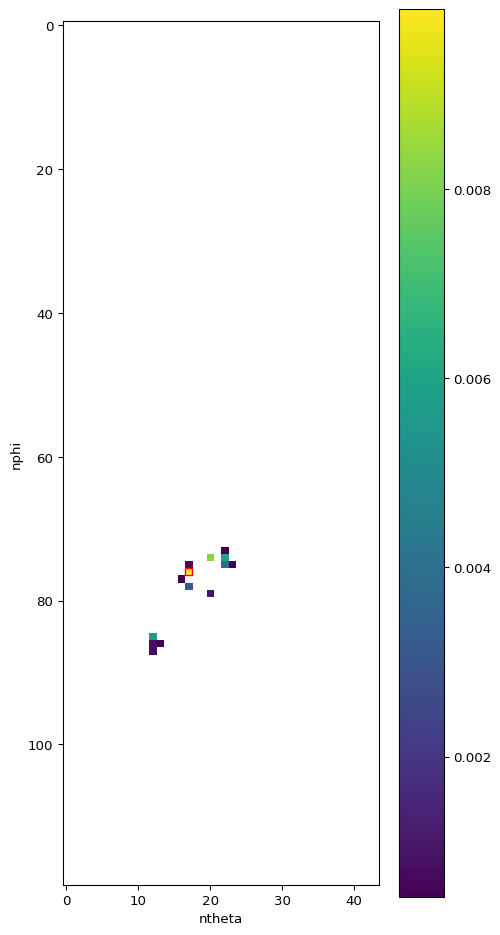

<Figure size 640x480 with 0 Axes>

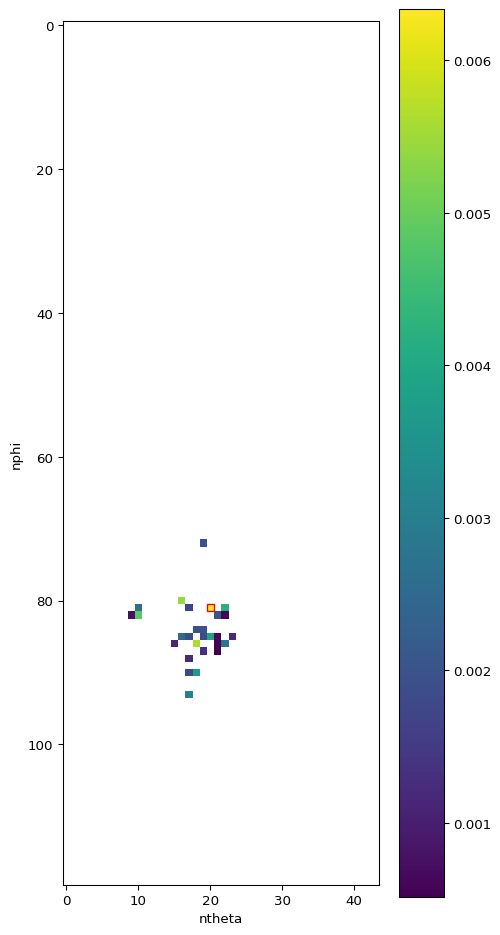

<Figure size 640x480 with 0 Axes>

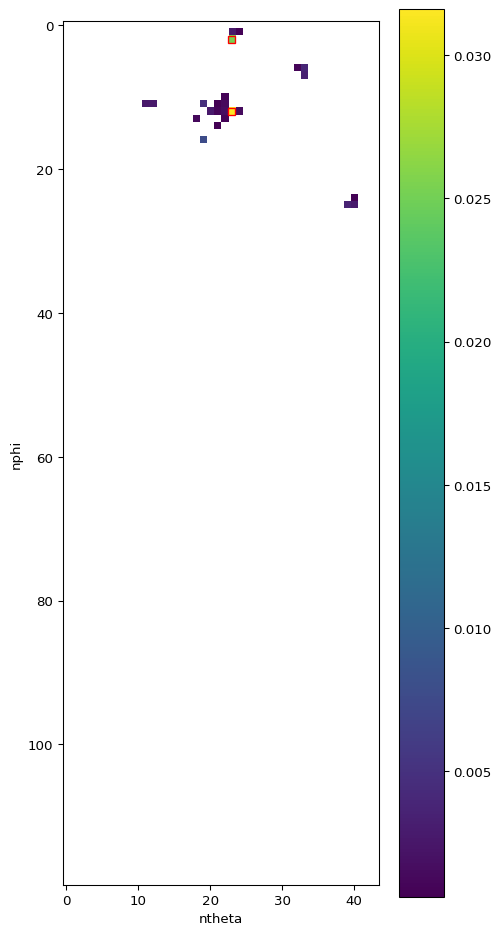

In [14]:
n = 0
for i in range(100):
    if geant4_root_data_info['leading_shower_etot'][i] > 0.05:
        continue
    img = getHitImgAll(dict(zip(geant4_root_data['all_hit_cell_id'][i], geant4_root_data['all_hit_energy'][i])))
    showHitImg(img, figsize=(5,10), marks=[emc_info.barrelId2Coordinate(j) for j in geant4_root_data['shower_id'][i] if emc_info.isInBarrel(j)])
    plt.show()
    n += 1